#Pytorch库：

##数据加载：'torchvision.dataset'

知名公共数据集可用'torchvision.datasets.名称' 加载。（如'torchvision.datasets.CIFAR10'）

私人数据集可用'torchvision.dataset.ImageFolder' 和'torch.utils.data.DataLoader' 加载

##数据归一：'torchvision.transforms'

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as ttf

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#归一化：
transform=ttf.Compose(
    [ttf.ToTensor(),
     ttf.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))#三个图层的平均值，标准差
#      ttf.Flip()#数据增强(翻转)
    ]
    )

#训练数据集
trainset=tv.datasets.CIFAR10(root='F:\dataset',train=True,download=True,transform=transform)

#加载方法
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

#测试数据集
testset=tv.datasets.CIFAR10(root='F:\dataset',train=False,download=True,transform=transform)

testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
def imshow(img):
    #输入数据：torch.tensor [c,h,w]
    img=img/2+0.5
    nping=img.numpy()
    nping=np.transpose(nping, (1,2,0)) #[h,w,c]
    plt.imshow(nping)
    pass

In [4]:
dataiter=iter(trainloader) #随机加载一个train batch

In [5]:
images, labels=dataiter.next()

In [6]:
images.size()

torch.Size([4, 3, 32, 32])

tensor([0, 6, 1, 3])


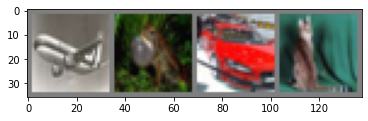

In [7]:
imshow(tv.utils.make_grid(images)) #这个函数的作用是把若干幅图拼成一个图像
print(labels)

In [8]:
class Net(nn.Module):
    def __init__(self):
        #定义神经网络结构，输入数据：1*32*32
        super(Net,self).__init__()
        #第一层：卷积层
        self.conv1=nn.Conv2d(3,6,3) #输入3层，输出6层，33的卷积核
        #第二层：卷积层
        self.conv2=nn.Conv2d(6,16,3)
        #第三层：全连接层
        self.fc1=nn.Linear(16*28*28,512) #16*28*28=12544
        #第四层：全连接层
        self.fc2=nn.Linear(512,64)
        #第五层：全连接层
        self.fc3=nn.Linear(64,10)
        pass
    
    def forward(self,x):
        #定义数据的流向
        x=self.conv1(x)
        x=F.relu(x)
        
        x=self.conv2(x)
        x=F.relu(x)
        
        x=x.view(-1,16*28*28)
        x=self.fc1(x)
        x=F.relu(x)
        
        x=self.fc2(x)
        x=F.relu(x)
        
        x=self.fc3(x)
        
        return x
    pass

In [9]:
net=Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [10]:
#损失函数和更新规则
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [ ]:
for epoch in range(2):
    for i,data in enumerate(trainloader):
        images,labels=data
        
        outputs=net(images)
        
        loss=criteron(outputs,labels)
        
        #更新权重第一步是清零梯度
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i%1000==0):
            print('Eopch:(), Step:(), Loss:()'.format(epoch,i,loss.item()))
            pass
        pass
    pass

In [ ]:
#模型测试
correct=0.0
total=0.0
with torch.no_grad():
    for data in testloader:
        images,labels =data
        
        outputs=net(images)
        _,predicted=torch.max(outputs.data,1)
        
        correct += (predicted==labels).sum()
        total+= labels.size(0)
        pass
    pass
print('准确率:',float(correct)/total)

In [ ]:
torch.save(net.state_dict(),'F:\torch_model\pic_classifier.pt')

In [ ]:
net2=Net()
net2.load_state_dict(torch.load('F:\torch_model\pic_classifier.pt'))